In [ ]:
# 원본 데이터셋 출처
# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data
# 2013년 9월 유럽 카드 소지자가 신용카드로 거래한 내용, 284807건의 거래 가운데 492건의 사기거래
# 변수 v1~v28, Amount 거래 금액, Class 0/1 정상거래/사기거래

In [2]:
import pandas as pd

# 신용카드 거래 데이터 csv 파일을 로딩(원본)
df = pd.read_csv("c:/data/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# 분류를 기준으로 한 평균값들
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [4]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

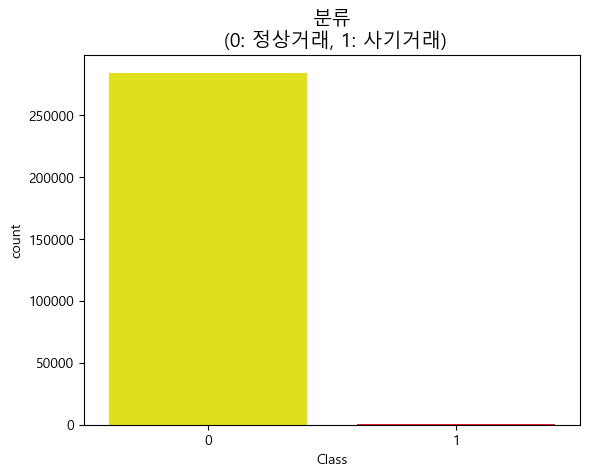

In [6]:
colors = ["yellow", "red"]
sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0: 정상거래, 1: 사기거래)', fontsize=14)
# 불균형 데이터셋

In [7]:
print("사기거래")
print(df.Amount[df.Class == 1].describe())
print()
print("정상거래")
print(df.Amount[df.Class == 0].describe())
# 사기거래 492건, 정상거래 284315건

사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [23]:
train_cols = df.columns[1:29]
print(train_cols)
X = df[train_cols] # 독립변수
y = df["Class"]
print(df[train_cols].head())
print(y.head())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0  0.098698  0.363787  0.090794  ...  0.403993  0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974  ... -0.145783 -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643  ... -2.261857  0.524980  0.247998  0.771679  

In [24]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

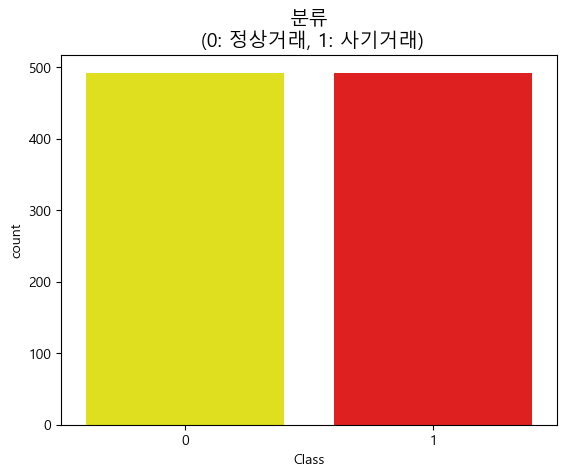

In [25]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors = ["yellow", "red"]
sns.countplot('Class', data=df2, palette=colors)
plt.title('분류\n (0: 정상거래, 1: 사기거래)', fontsize=14)

In [26]:
train_cols = df.columns[1:29]
X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [27]:
import statsmodels.api as sm

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 모델의 설명력 82.1%
# p-value 유의하지 않은 변수들 확인 : V13, V24, V26

Optimization terminated successfully.
         Current function value: 0.123775
         Iterations 18
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.821      
Dependent Variable: Class            AIC:              299.5887   
Date:               2023-04-03 13:08 BIC:              436.5542   
No. Observations:   984              Log-Likelihood:   -121.79    
Df Model:           27               LL-Null:          -682.06    
Df Residuals:       956              LLR p-value:      6.4959e-219
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     18.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
V1      -9.9827     0.9703   -10.2881   0.0000   -11.8845    -8.0809
V2       9.7118     0.9835     9.8751   0.00

In [28]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
    'V20','V21', 'V22', 'V23', 'V25', 'V27', 'V28']
X = X_samp[cols]
y = y_samp['Class']
df2 = pd.concat([X,y],axis=1)

In [29]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())
# 모델의 설명력 81.7%
# p-value 유의하지 않은 변수들 확인 :

Optimization terminated successfully.
         Current function value: 0.126588
         Iterations 18
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.817      
Dependent Variable: Class            AIC:              299.1242   
Date:               2023-04-03 13:10 BIC:              421.4148   
No. Observations:   984              Log-Likelihood:   -124.56    
Df Model:           24               LL-Null:          -682.06    
Df Residuals:       959              LLR p-value:      3.1568e-220
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     18.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
--------------------------------------------------------------------
V1      -9.6254     0.9146   -10.5239   0.0000   -11.4180    -7.8328
V2       9.4322     0.9361    10.0763   0.00

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.951715374841169
검증용: 0.9238578680203046


In [31]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[87,  4],
       [11, 95]], dtype=int64)

In [32]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,87,4
1,11,95


<AxesSubplot:title={'center':'Confusion Matrix'}>

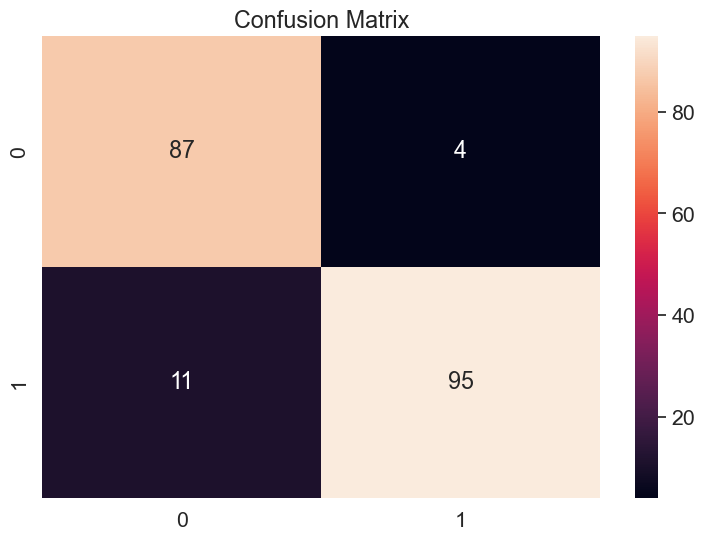

In [33]:
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자